# Simple linear regression 

####  Linear regression class is implemented with Normal equation and Gradient descent methods
####  Dataset is downloaded from super data science website. Independent column is Years of experience and Dependent column is Salary

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;

In [129]:
class LinearRegression:
    def __init__(self,X,Y): 
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])
        
    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            
        
    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage
    
    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100
        
        
    
        
    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
        
    def returnY(self):
        return self.Y


In [130]:
#importing data
Data=pd.read_csv('Salary_Data.csv')
print(Data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [27]:
Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


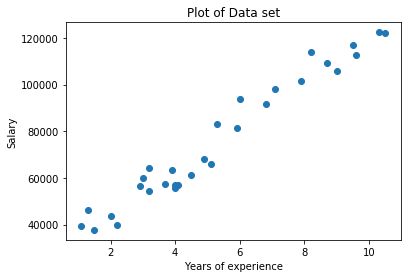

In [99]:
#plot of dataset
plt.scatter(Data.iloc[:,0:1].values,Data.iloc[:,1].values)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of Data set')
plt.show()

In [102]:
#training and testing size
train_size=int(0.7*Data.shape[0])
test_size=int(0.3*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 21
Testing set size : 9


In [75]:
#training set split
X_train=Data.iloc[0:train_size,0:1].values
Y_train=Data.iloc[0:train_size,1].values
print(X_train.shape)
print(Y_train.shape)

(21, 1)
(21,)


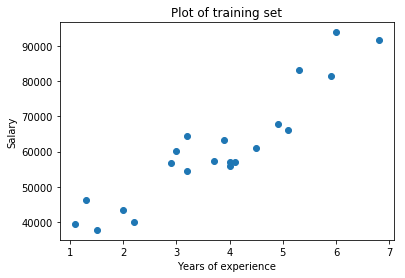

In [76]:
#scatter plot of training set
plt.scatter(X_train,Y_train)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of training set')
plt.show()

In [73]:
#testing set split
X_test=Data.iloc[train_size:,0:1].values
Y_test=Data.iloc[train_size:,1].values
print(X_test.shape)
print(Y_test.shape)

(9, 1)
(9,)


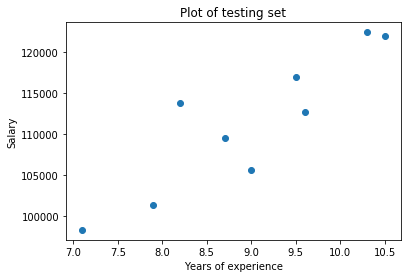

In [100]:
#scatter plot of testing set
plt.scatter(X_test,Y_test)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Plot of testing set')
plt.show()

In [77]:
lr=LinearRegression(X_train,Y_train)

In [78]:
theta=lr.returnTheta()
print(theta)

[ 0.5896577  -0.56378729]


In [87]:
y_pred_normal,error_percentage=lr.predictUsingNormalEquation(X_test,Y_test)
print(error)

[ 6.28828005  1.74049746 10.08776554  2.23577964  3.97268     2.17075747
  2.41983135  0.42126512  1.53012184]


In [80]:
print(lr.computeCostFunction())

1973733197.7409067


In [119]:
#learning parameters
n_iter=1000
alpha=0.01

In [120]:
theta,J_Array,theta_array=lr.performGradientDescent(n_iter,alpha)

In [121]:
y_pred_grad,ErrorPercentage=lr.predict(X_test,Y_test)
print(ErrorPercentage)

[4.95911997 0.07571477 8.48068289 0.34718242 6.06518211 0.07878139
 4.6345027  1.88872187 3.92794853]


In [122]:
#let's see how train set is predicted
y_pred_train,error_for_train=lr.predict(X_train,Y_train)
print(error_for_train)

[11.78555624 20.65219683  2.35375766  0.03398984 13.97721233  7.64061432
 11.40078943  1.47647903 14.26973542  5.16004586  1.77414269 13.04915295
 10.74081218 12.2139877  11.2168906   5.80034989 11.82220775  8.7816178
  0.36608894 12.02993095  1.38780194]


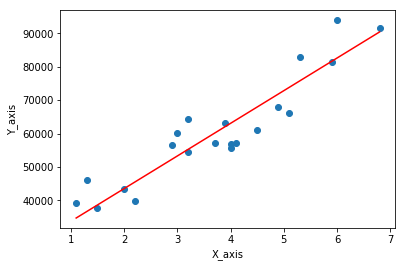

In [123]:
#let's see how train set is predicted using gradient descent
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train,'r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Training set prediction using')
plt.show()

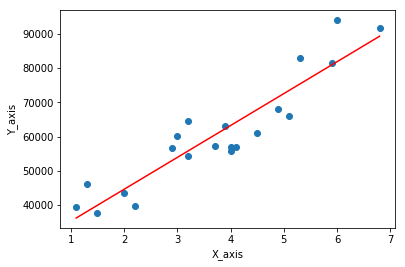

In [128]:
#let's see how train set is predicted using normal equation
y_pred_train_normal,error_percentage_train_normal=lr.predictUsingNormalEquation(X_train,Y_train)
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train_normal,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.show()

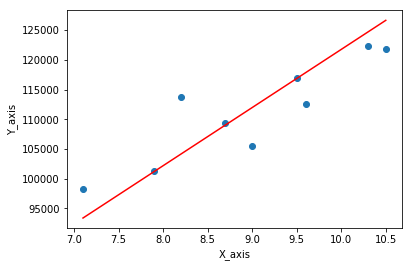

In [125]:
#let's see how test set is predicted using gradient descent
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_grad,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.show()

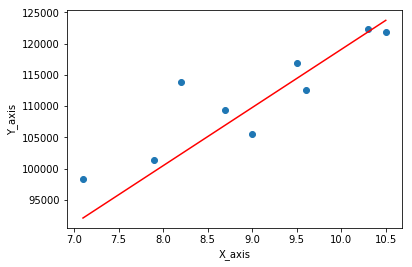

In [126]:
#let's see how test set is predicted using normal equation method
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_normal,'r')
plt.xlabel('X_axis')
plt.ylabel('Y_axis')
plt.show()

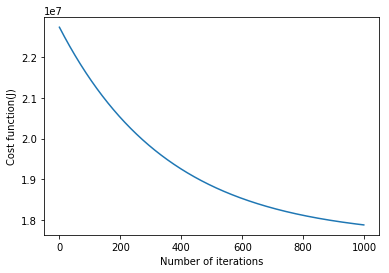

In [127]:
#plot of how cost function is minimized as number of iterations is proceeded
x=[i for i in range(1000)]
plt.plot(x,J_Array)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function(J)')
plt.show()